# Benchmark Evaluation

All tests were executed on a standard Lenovo laptop with Intel i7, 8th generation (8 threads) on Windows 10.

The HT-Grouper was executed in release mode (fast option)

### Analyze results

In [47]:
from ht_grouper_helpers import read_grouping_from_json, read_hamiltonian_from_json
from sorted_insertion import R_hat, sorted_insertion, sorted_insertion_qwc

shot_reduction_tpb = []
shot_reduction_gc = []


qubit_numbers_all_subgraphs = [8, 12, 16]
runtime_all_subgraphs       = [7, 620, 21554] # in seconds
shot_reduction_ht_all_subgraphs = []
for n in qubit_numbers_all_subgraphs:
    n_at = n//2
    ht_grouping = read_grouping_from_json(f"grouping_result/benchmark/H{n_at}_bk_lin_all_subgraphs.json")
    ham = read_hamiltonian_from_json(f"hamiltonians/examples/H{n_at}_bk.json")
    shot_reduction_ht_all_subgraphs.append(R_hat(ht_grouping, ham))

    
qubit_numbers_100_subgraphs = [8, 12, 16, 20, 24]
runtime_100_subgraphs       = [6, 46, 150, 796, 2062] # in seconds
shot_reduction_ht_100_subgraphs = []
for n in qubit_numbers_100_subgraphs:
    n_at = n//2
    ht_grouping = read_grouping_from_json(f"grouping_result/benchmark/H{n_at}_bk_lin_100_subgraphs.json")
    ham = read_hamiltonian_from_json(f"hamiltonians/examples/H{n_at}_bk.json")
    shot_reduction_ht_100_subgraphs.append(R_hat(ht_grouping, ham))

    qwc_grouping = sorted_insertion_qwc(ham)
    shot_reduction_tpb.append(R_hat(qwc_grouping, ham))

    gc_grouping = sorted_insertion(ham)
    shot_reduction_gc.append(R_hat(gc_grouping, ham))



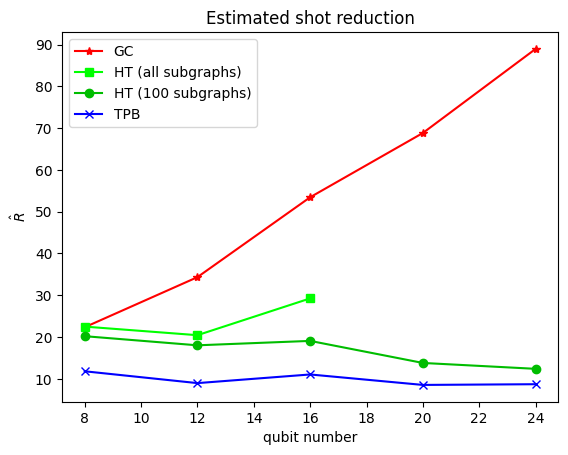

In [48]:
import matplotlib.pyplot as plt

green1 = '#00FF00'
green2 = '#00BD00'


plt.title('Estimated shot reduction')
plt.plot(qubit_numbers_100_subgraphs, shot_reduction_gc, label ='GC', color='r', marker='*')
plt.plot(qubit_numbers_all_subgraphs, shot_reduction_ht_all_subgraphs, label='HT (all subgraphs)', color=green1, marker='s')
plt.plot(qubit_numbers_100_subgraphs, shot_reduction_ht_100_subgraphs, label='HT (100 subgraphs)', color=green2, marker='o')
plt.plot(qubit_numbers_100_subgraphs, shot_reduction_tpb, label='TPB', color='b', marker='x')
plt.xlabel('qubit number')
plt.ylabel('$\hat R$')


plt.legend()

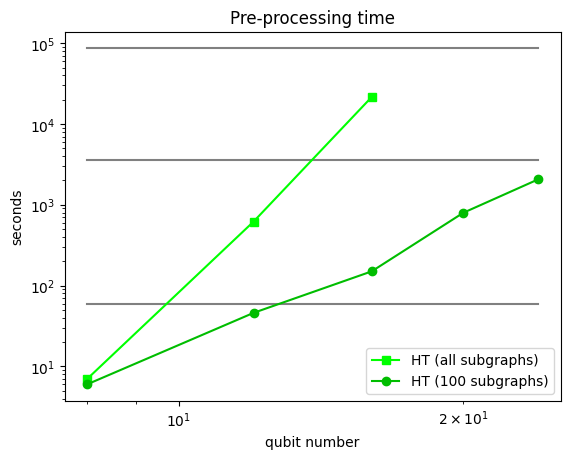

In [49]:
plt.loglog([8, max(qubit_numbers_100_subgraphs)], [60,60], color='gray') # minute
plt.loglog([8, max(qubit_numbers_100_subgraphs)], [3600,3600], color='gray') # hour
plt.loglog([8, max(qubit_numbers_100_subgraphs)], [86400,86400], color='gray') #day



plt.title('Pre-processing time')
plt.loglog(qubit_numbers_all_subgraphs, runtime_all_subgraphs, label='HT (all subgraphs)', color=green1, marker='s')
plt.loglog(qubit_numbers_100_subgraphs, runtime_100_subgraphs, label='HT (100 subgraphs)', color=green2, marker='o')
plt.ylabel('seconds')
plt.xlabel('qubit number')


plt.legend()

In [50]:
shot_reduction_ht_100_subgraphs

[20.205589349794337,
 18.021759448300077,
 19.078081574730437,
 13.800549286699148,
 12.39335301189288]